In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 38s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [10]:
X_train[0].shape

(32, 32, 3)

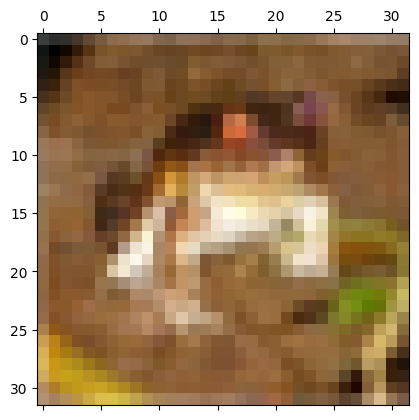

In [11]:
plt.matshow(X_train[0])

In [24]:
c='airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks'
classes=c.split(',')
classes=[i.strip() for i in classes]
classes[9]='trucks'

In [31]:
y_train[0]

array([6], dtype=uint8)

In [28]:
classes[y_train[0][0]]

'frogs'

In [32]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [33]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [38]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 80s 51ms/step - loss: 1.8089 - accuracy: 0.3554
Epoch 2/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6214 - accuracy: 0.4280
Epoch 3/50
1563/1563 [==============================] - 79s 51ms/step - loss: 1.5396 - accuracy: 0.4570
Epoch 4/50
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4795 - accuracy: 0.4779
Epoch 5/50
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4276 - accuracy: 0.4992
Epoch 6/50
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3858 - accuracy: 0.5124
Epoch 7/50
1563/1563 [==============================] - 80s 51ms/step - loss: 1.3478 - accuracy: 0.5287
Epoch 8/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3147 - accuracy: 0.5375
Epoch 9/50
1563/1563 [==============================] - 77s 49ms/step - loss: 1.2805 - accuracy: 0.5511
Epoch 10/50
1563/1563 [==============================] - 80s 51m

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 452.3618 - accuracy: 0.4861


[452.3618469238281, 0.4860999882221222]

In [46]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [49]:
predictions = probability_model.predict(X_test_scaled)


313/313 [==============================] - 4s 13ms/step


In [53]:
import numpy as np

print(classes[np.argmax(predictions[0])])
classes[y_test[0][0]]

'cats'

In [56]:
classes[y_test[0][0]]

'cats'

In [57]:
print(classes[np.argmax(predictions[1])])
classes[y_test[1][0]]

ships


'ships'

In [58]:
print(classes[np.argmax(predictions[2])])
classes[y_test[2][0]]

cars


'ships'

In [59]:
print(classes[np.argmax(predictions[3])])
classes[y_test[3][0]]

ships


'airplanes'

In [60]:
print(classes[np.argmax(predictions[4])])
classes[y_test[4][0]]

deer


'frogs'

In [63]:
for i in range(10):
    print(classes[np.argmax(predictions[i])],end='\t')
    print(classes[y_test[i][0]])

cats	cats
ships	ships
cars	ships
ships	airplanes
deer	frogs
frogs	frogs
cars	cars
frogs	frogs
cats	cats
cars	cars


In [66]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 4s 14ms/step


3

In [70]:
X_test_scaled[0].shape

(32, 32, 3)